In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('Data.csv', header=0)

In [3]:
# Add 100 random synthetic data to the dataframe
for i in range(500):
  print(i)
  df = df.append(df.sample(n=1), ignore_index=True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115


C:\Users\joelt\AppData\Local\Temp\ipykernel_10464\1218784994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df.sample(n=1), ignore_index=True)


116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365


In [4]:
df.head()

,Timestamp,Year of birth,Sex,Marital Status,Region,Living alone?,number of people sharing the place with,Employment status,Industry,Income,...,Have debts,Debts repayment amount,Healthcare,Rent,Groceries,Utilities,Entertainment,Insurance,Unexpected expenses,Other expanses
0,3/22/2023 20:50:47,2000,Male,Single,Beirut,No,3.0,Employed,Computer and information technology,Between $1200 and $1500,...,No,NaN,0,0,0,0,100,0,0,0
1,3/22/2023 20:54:26,2000,Male,Single,Mount Lebanon,No,2.0,Employed,Computer and information technology,Between $1000 and $1200,...,No,NaN,0,0,150,200,100,0,0,0
2,3/22/2023 21:19:19,2003,Female,Single,Beirut,No,2.0,Not Employed,NaN,Between $0 and $300,...,No,NaN,50,500,1000,2000,1000,20,1000,500
3,3/22/2023 21:20:37,2004,Male,Single,Mount Lebanon,No,4.0,Not Employed,NaN,Between $0 and $300,...,No,NaN,40,0,300,150,50,40,20,30
4,3/22/2023 21:22:26,2000,Male,Single,Beirut,No,4.0,Employed,Computer and information technology,More than $1500,...,No,NaN,100,0,500,300,2000,200,100,100


In [5]:
df.drop(columns=['Timestamp'], inplace=True)
for col in df:
  if col != "Year of birth" and col != "number of people sharing the place with" and col != "Budget limit" and col != "Debts repayment amount" and col != "Healthcare" and col != "Rent" and col != "Groceries" and col != "Utilities" and col != "Entertainment" and col != "Insurance" and col != "Unexpected expenses" and col != "Other expanses":
    df[col], labels = df[col].factorize(sort=True)
  else:
    try:
      # Replace NaN values with 0
      if col == 'Debts repayment amount' or col == 'number of people sharing the place with' or col == 'Budget limit':
        df[col] = df[col].fillna(0)
      df[col], label = int(df[col])
    except:
      print('error')
    
# df.head()


error
error
error
error
error
error
error
error
error
error
error
error


In [6]:
df.corr()

,Year of birth,Sex,Marital Status,Region,Living alone?,number of people sharing the place with,Employment status,Industry,Income,Expenses,...,Have debts,Debts repayment amount,Healthcare,Rent,Groceries,Utilities,Entertainment,Insurance,Unexpected expenses,Other expanses
Year of birth,1.000000,-0.336127,-0.063057,0.052819,-0.213004,0.356458,0.337074,-0.286376,-0.511465,-0.477720,...,-0.276788,-0.414976,0.167725,-0.182530,0.045312,0.158244,-0.132188,0.105871,-0.323090,0.170644
Sex,-0.336127,1.000000,0.209968,-0.338574,0.415637,-0.491856,0.058479,-0.001540,0.131809,0.021934,...,0.214869,0.206571,-0.227383,-0.061234,-0.128806,-0.082573,0.191019,-0.033246,-0.013938,-0.096047
Marital Status,-0.063057,0.209968,1.000000,-0.212491,0.371138,-0.303654,0.496411,0.223248,-0.087608,-0.038774,...,-0.036336,-0.034745,0.102499,0.085791,-0.061710,-0.017824,-0.048863,-0.077338,-0.034243,-0.076722
Region,0.052819,-0.338574,-0.212491,1.000000,0.056122,0.067666,0.065241,-0.241771,-0.272085,-0.072056,...,0.129298,0.169563,-0.132205,-0.165777,-0.054835,-0.188846,-0.117463,-0.026239,-0.230478,-0.202477
Living alone?,-0.213004,0.415637,0.371138,0.056122,1.000000,-0.666174,0.379684,-0.128398,-0.265134,0.119788,...,0.533365,0.511746,-0.112779,0.080608,-0.039234,-0.114828,0.027867,-0.114968,-0.106005,0.007779
number of people sharing the place with,0.356458,-0.491856,-0.303654,0.067666,-0.666174,1.000000,-0.144018,-0.039294,-0.091774,-0.142453,...,-0.299774,-0.269539,0.336210,-0.364259,0.089647,0.183973,-0.004663,0.118367,-0.080749,0.423758
Employment status,0.337074,0.058479,0.496411,0.065241,0.379684,-0.144018,1.000000,-0.496440,-0.474142,-0.302354,...,-0.005556,-0.052277,0.232745,-0.082725,0.090235,0.088303,-0.084125,-0.130613,-0.131157,0.133163
Industry,-0.286376,-0.001540,0.223248,-0.241771,-0.128398,-0.039294,-0.496440,1.000000,0.243137,0.264596,...,-0.005663,0.052419,-0.380409,0.222845,-0.217168,-0.223628,0.013336,-0.225380,0.004489,-0.240732
Income,-0.511465,0.131809,-0.087608,-0.272085,-0.265134,-0.091774,-0.474142,0.243137,1.000000,0.475293,...,-0.100594,-0.071820,0.088941,0.363730,0.213466,0.029424,0.222150,0.194862,0.423137,-0.132595
Expenses,-0.477720,0.021934,-0.038774,-0.072056,0.119788,-0.142453,-0.302354,0.264596,0.475293,1.000000,...,0.210126,0.281300,-0.105662,0.610797,0.252388,0.034233,0.438589,0.137075,0.435011,0.082612


In [7]:
# Split to feature and result cols
feature_cols = ['number of people sharing the place with', 'Employment status', 'Income', 'Marital Status', 'Industry']
result_cols = ['Expenses']
X = df[feature_cols]
y = df[result_cols]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [9]:
# define the model
model = Sequential()
model.add(Dense(128, input_shape=(5,), activation='relu'))  # input layer
model.add(Dense(64, activation='relu'))                     # hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))                                         # output layer

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=300)

# model = RandomForestRegressor()

# model.fit(X=X_train, y=y_train)

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 2.4985
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 1.7368
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 1.7922
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 1.6707
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 1.5638
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 1.5460
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 1.4306
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 1.4062
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 1.3603
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 1.3146
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 1.3000
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 1.2543
Epoch 13/300
4/4 [==============================] - 0s 4ms/st

In [10]:
print(X_test)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# # print(list(zip(y_test, y_pred)))
# print(y_test[:1])
# print(y_pred)


     number of people sharing the place with  Employment status  Income  \
486                                      4.0                  0       4   
73                                       2.0                  0       3   
349                                      1.0                  0       6   
86                                       3.0                  0       0   
457                                      4.0                  0       3   
..                                       ...                ...     ...   
40                                       3.0                  0       0   
379                                      3.0                  0       6   
504                                      3.0                  1       0   
442                                      2.0                  2       6   
216                                      0.0                  2       0   

     Marital Status  Industry  
486               0         5  
73                0         6  
349

[(array([1.4838313], dtype=float32), 1), (array([-0.02288115], dtype=float32), 0), (array([3.0268617], dtype=float32), 3), (array([-0.11072545], dtype=float32), 0), (array([1.8928428], dtype=float32), 2), (array([2.0961003], dtype=float32), 2), (array([-0.00823423], dtype=float32), 0), (array([0.26544848], dtype=float32), 0), (array([1.0132283], dtype=float32), 1), (array([2.0961003], dtype=float32), 2), (array([2.2016604], dtype=float32), 2), (array([-0.02288115], dtype=float32), 0), (array([-0.02265313], dtype=float32), 0), (array([-0.02288115], dtype=float32), 0), (array([2.0961003], dtype=float32), 2), (array([0.00852804], dtype=float32), 0), (array([1.4838313], dtype=float32), 1), (array([-0.01414283], dtype=float32), 0), (array([-0.01414283], dtype=float32), 0), (array([2.2016604], dtype=float32), 2), (array([1.4838313], dtype=float32), 1), (array([-0.10028625], dtype=float32), 0), (array([1.378431], dtype=float32), 1), (array([1.0380409], dtype=float32), 1), (array([1.4838313], 

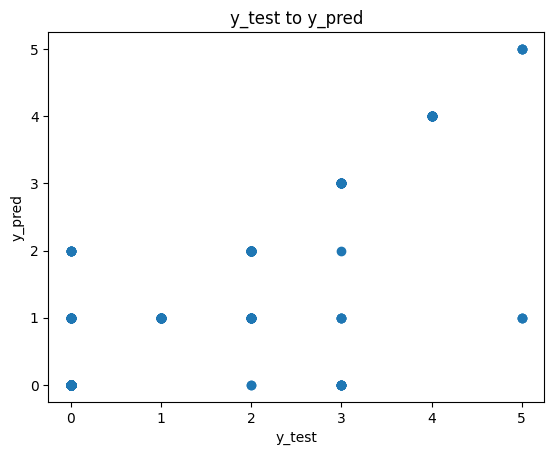

In [11]:
# round y_pred to the nearest integer

new_y_pred = [round(n - 0.05) for n in np.nditer(y_pred)]
print(list(zip(y_pred, new_y_pred)))
plt.scatter(y_test, new_y_pred, marker='o')
plt.title('y_test to y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [12]:
import pickle

# Save the model
filename = 'finalized_model_v2.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))